In [49]:
import riskfolio as rp
import pandas_datareader.data as web
import pandas as pd
import datetime as dt

# 한글 깨짐 방지
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [50]:
codes = ['005930', '035420','006400']
df = {}
for code in codes:
    df[code] = web.DataReader(code, 'naver', start='2021-01-01', end='2021-12-31')['Close']

df = pd.DataFrame(df)
for column in df.columns:
    df[column] = df[column].astype(float)
df = df.pct_change().dropna()

df.columns = ['삼성전자', 'NAVER', '삼성SDI']
df

,삼성전자,NAVER,삼성SDI
Date,,,
2021-01-05,1.0843%,-0.1706%,2.2355%
2021-01-06,-2.0262%,-0.8547%,-0.8746%
2021-01-07,0.8516%,-0.1724%,2.6471%
2021-01-08,7.1170%,7.7720%,5.8739%
2021-01-11,2.4775%,-0.9615%,-1.2179%
...,...,...,...
2021-12-24,0.7509%,1.5873%,1.2442%
2021-12-27,-0.3727%,-0.9115%,-1.0753%
2021-12-28,0.1247%,1.0512%,1.0870%


In [43]:
# Building the portfolio object
port = rp.Portfolio(returns = df)

# Calculating optimal portfolio
# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)



,삼성전자,NAVER,삼성SDI
weights,43.2546%,28.0749%,28.6705%


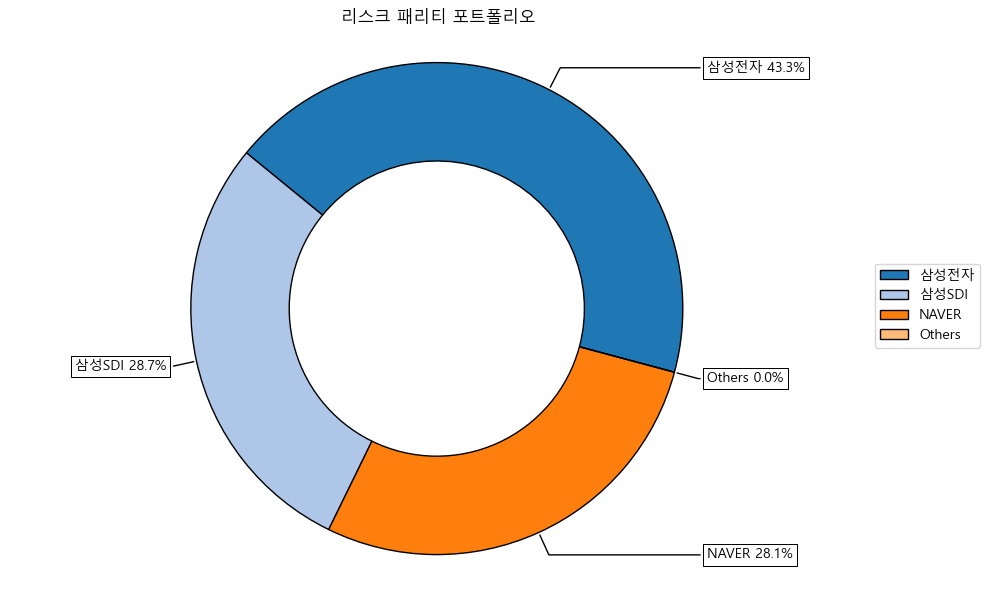

In [44]:
ax = rp.plot_pie(w=w_rp, title='리스크 패리티 포트폴리오', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


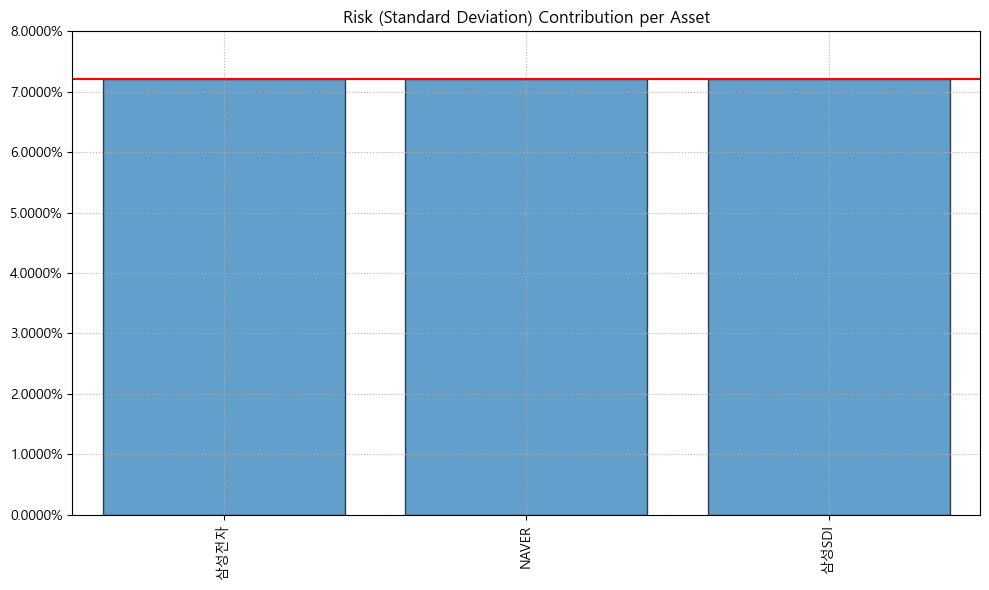

In [39]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

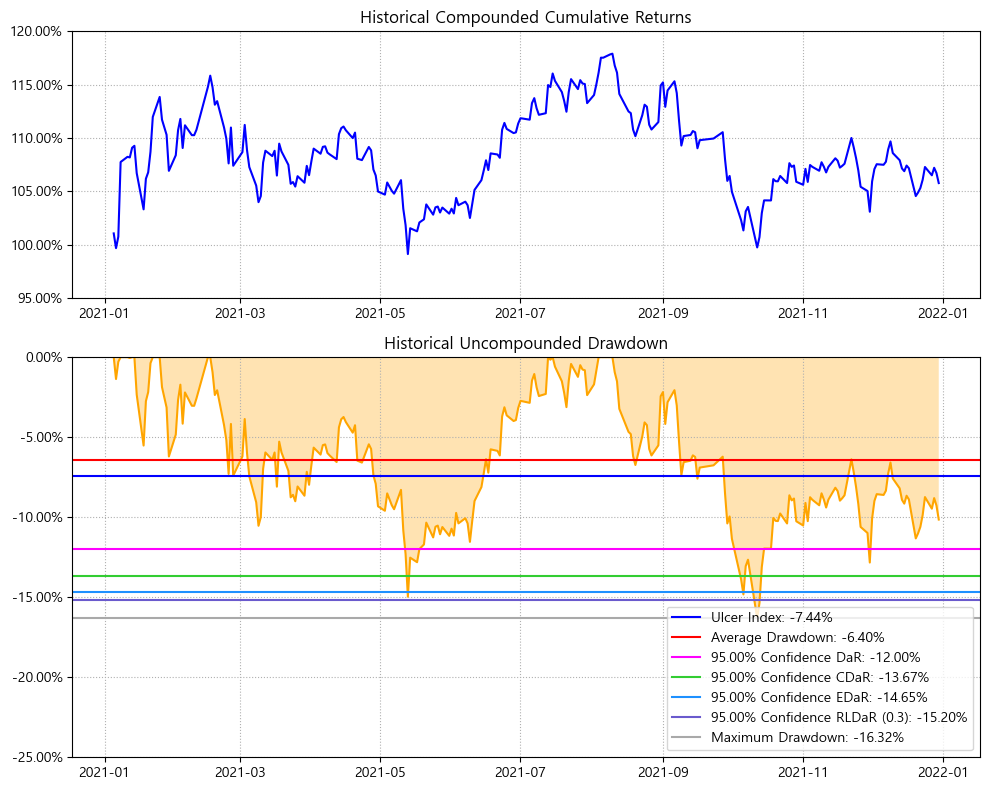

In [48]:
ax = rp.plot_drawdown(returns=df,
                      w=w_rp,
                      alpha=0.05,
                      height=8,
                      width=10,
                      ax=None)